In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping  

In [30]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_set = train_set.map(lambda x, y: (x / 255.0, y))

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    'tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_set = val_set.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [31]:
base_model = tf.keras.applications.MobileNet(input_shape=(256, 256, 3),
                                              include_top=False,
                                              weights='imagenet')
base_model.trainable = False

model = Sequential()

# Convolutional layer
model.add(base_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

# Output layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Fauzan-PC\AppData\Local\Temp\ipykernel_8172\685487820.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(input_shape=(256, 256, 3),


In [32]:
history = model.fit(train_set, 
                    epochs=100, 
                    validation_data=val_set,
                    callbacks=[EarlyStopping(patience=0)])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.2006 - loss: 2.2590 - val_accuracy: 0.5370 - val_loss: 1.5097
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 512s 2s/step - accuracy: 0.6001 - loss: 1.3650 - val_accuracy: 0.6730 - val_loss: 1.0938
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.7234 - loss: 1.0044 - val_accuracy: 0.7280 - val_loss: 0.8947
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 524s 2s/step - accuracy: 0.7839 - loss: 0.8130 - val_accuracy: 0.7610 - val_loss: 0.7740
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.8130 - loss: 0.6987 - val_accuracy: 0.7930 - val_loss: 0.6928
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.8269 - loss: 0.6186 - val_accuracy: 0.8000 - val_loss: 0.6355
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 0.8440 - loss: 0.5562 - val_accuracy: 0.8200 - val_loss: 0.5913
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 515s 2s/step - accuracy: 0.8573 - loss: 0.5142 - 

In [33]:
loss, accuracy = model.evaluate(val_set)
print(f'Test accuracy: {accuracy*100:.2f}%')


32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.8833 - loss: 0.3431
Test accuracy: 89.50%


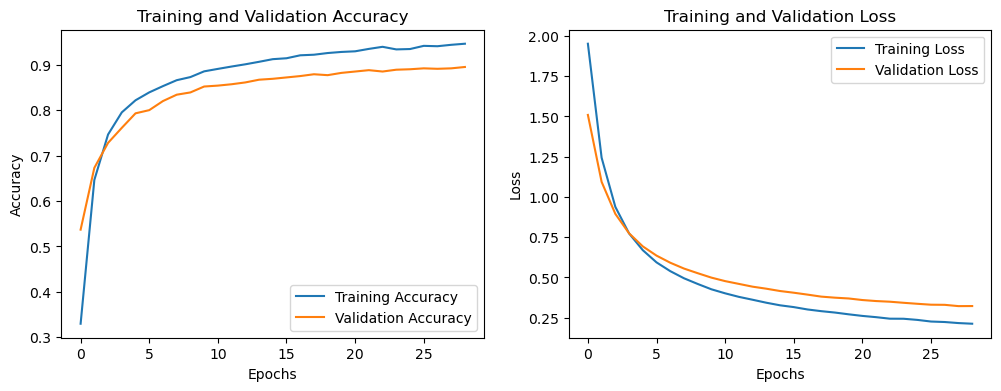

In [34]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
